## Question 1

### a)

In [6]:
import numpy as np
from tensorflow import keras
from keras.datasets import cifar10
from keras import layers

model = keras.Sequential()

model.add(layers.InputLayer(input_shape=(32,32,3)))
model.add(layers.Conv2D(64,5,activation='relu',padding='same'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32,3,activation='relu',padding='same'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32,3,activation='relu',padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))
model.add(layers.Softmax())


### b)

In [16]:
epochs = 10
batch_size = 64

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = np.divide(X_train,255)

model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(),metrics=keras.metrics.SparseCategoricalAccuracy())

history = model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,validation_split=0.1)

Epoch 1/10
704/704 [==============================] - 47s 66ms/step - loss: 1.3052 - sparse_categorical_accuracy: 0.5317 - val_loss: 1.0481 - val_sparse_categorical_accuracy: 0.6320
Epoch 2/10
704/704 [==============================] - 46s 65ms/step - loss: 0.9281 - sparse_categorical_accuracy: 0.6712 - val_loss: 0.9051 - val_sparse_categorical_accuracy: 0.6882
Epoch 3/10
704/704 [==============================] - 46s 65ms/step - loss: 0.7988 - sparse_categorical_accuracy: 0.7208 - val_loss: 0.9077 - val_sparse_categorical_accuracy: 0.6910
Epoch 4/10
704/704 [==============================] - 46s 65ms/step - loss: 0.7141 - sparse_categorical_accuracy: 0.7504 - val_loss: 0.8583 - val_sparse_categorical_accuracy: 0.7032
Epoch 5/10
704/704 [==============================] - 47s 66ms/step - loss: 0.6419 - sparse_categorical_accuracy: 0.7748 - val_loss: 0.8497 - val_sparse_categorical_accuracy: 0.7112
Epoch 6/10
704/704 [==============================] - 46s 66ms/step - loss: 0.5799 - spars

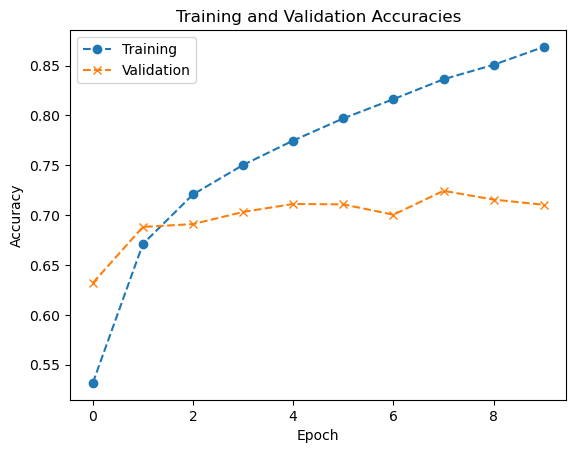

In [17]:
import matplotlib.pyplot as plt

epochs = history.epoch
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

plt.plot(epochs,train_acc,"o--")
plt.plot(epochs,val_acc,"x--")
plt.title("Training and Validation Accuracies")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training","Validation"])



## Question 2

### a)

In [35]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

data = load_breast_cancer()
features = ['worst compactness', 'worst concavity', 'worst area']
X_idx = [list(data.feature_names).index(f) for f in features]
X = data.data[:, X_idx]
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)


print(f'Linear Accuracy: {accuracy_linear*100:0.2f}%')

Linear Accuracy: 91.23%


### b)

In [37]:
svm_rbf = SVC(kernel='rbf', C=2)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f'RBF Accuracy: {accuracy_rbf*100:0.2f}%')

RBF Accuracy: 92.40%
